<a href="https://colab.research.google.com/github/108mahima/Apka-Samvidhaan/blob/master/Copy_of_Churn_Prediction_for_ConnectSphere_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📘 Churn Prediction for ConnectSphere Telecom
print('Hello from YBI Foundation 🚀')

Hello from YBI Foundation 🚀


In [ ]:
!pip install -q scikit-learn pandas matplotlib seaborn

In [ ]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# 2. LOAD DATA
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving churn_data.csv to churn_data.csv


In [ ]:
# 3. CLEAN & PREPROCESS
# Remove rows with missing/blank TotalCharges
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
# One-hot encode 'Contract' column
df = pd.get_dummies(df, columns=['Contract'], drop_first=True)


In [ ]:
# 4. SELECT FEATURES
features = ['Tenure', 'MonthlyCharges', 'TotalCharges',
            'Contract_One year', 'Contract_Two year']
X = df[features]
y = df['Churn']

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# 5. BUILD ANN
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 6. TRAIN MODEL
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.4922 - loss: 0.7163 - val_accuracy: 0.3000 - val_loss: 0.7278
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5134 - loss: 0.7026 - val_accuracy: 0.3000 - val_loss: 0.7098
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5228 - loss: 0.6889 - val_accuracy: 0.4000 - val_loss: 0.6942
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5378 - loss: 0.6863 - val_accuracy: 0.4000 - val_loss: 0.6787
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5747 - loss: 0.6693 - val_accuracy: 0.5000 - val_loss: 0.6638
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5545 - loss: 0.6652 - val_accuracy: 0.6000 - val_loss: 0.6496
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6135 - loss: 0.6549 - val_accuracy: 0.6000 - val_loss: 0.6351
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6325 - loss: 0.6459 - val_accuracy: 0.6000 - val_loss: 0.6202

In [ ]:
# 7. EVALUATE MODEL
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step

Accuracy: 0.8462
F1-Score: 0.7143

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.83      0.62      0.71         8

    accuracy                           0.85        26
   macro avg       0.84      0.78      0.80        26
weighted avg       0.84      0.85      0.84        26



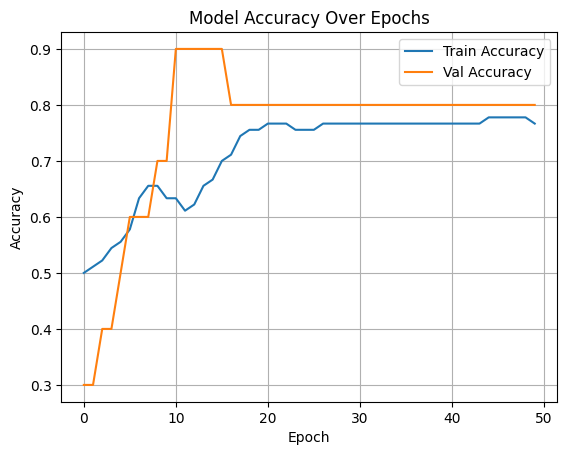

In [ ]:
# 8. VISUALIZE ACCURACY
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 9. AT-RISK CUSTOMERS
df['Churn_Probability'] = model.predict(scaler.transform(X))
df['Predicted_Churn'] = (df['Churn_Probability'] > 0.5).astype(int)

at_risk_customers = df[df['Predicted_Churn'] == 1]
print("\n🔔 At-Risk Customers:\n", at_risk_customers[['ID', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Probability']].head())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

🔔 At-Risk Customers:
     ID  Tenure  MonthlyCharges  TotalCharges  Churn_Probability
4    4       2           70.70        151.65           0.593361
5    5       8           99.65        820.50           0.616614
6    6      22           89.10       1949.40           0.554057
30  30       5           69.70        316.90           0.577826
32  32      11           97.85       1105.40           0.605739
